In [1]:
import datetime as dt
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('data/FPA_FOD_20170508.sqlite')

# Data Pre-Processing

## Feature Selection from the dataset

In [3]:
df = pd.read_sql_query("SELECT STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,SOURCE_REPORTING_UNIT_NAME,FIRE_SIZE_CLASS,FIRE_YEAR,CONT_DATE FROM 'Fires'", conn)

In [4]:
print(df.head())

  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  FIRE_SIZE  \
0    Miscellaneous  40.036944 -121.005833    CA       2453403.5       0.10   
1        Lightning  38.933056 -120.404444    CA       2453137.5       0.25   
2   Debris Burning  38.984167 -120.735556    CA       2453156.5       0.10   
3        Lightning  38.559167 -119.913333    CA       2453184.5       0.10   
4        Lightning  38.559167 -119.933056    CA       2453184.5       0.10   

  SOURCE_REPORTING_UNIT_NAME FIRE_SIZE_CLASS  FIRE_YEAR  CONT_DATE  
0     Plumas National Forest               A       2005  2453403.5  
1   Eldorado National Forest               A       2004  2453137.5  
2   Eldorado National Forest               A       2004  2453156.5  
3   Eldorado National Forest               A       2004  2453189.5  
4   Eldorado National Forest               A       2004  2453189.5  


## Convert date from Julian to Gregorian calendar format

In [5]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['DAY_OF_WEEK'] = pd.to_datetime(df['DISCOVERY_DATE']).dt.weekday_name
df['MONTH'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).month
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [6]:
print(df.head())

  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE DISCOVERY_DATE  FIRE_SIZE  \
0    Miscellaneous  40.036944 -121.005833    CA     2005-02-02       0.10   
1        Lightning  38.933056 -120.404444    CA     2004-05-12       0.25   
2   Debris Burning  38.984167 -120.735556    CA     2004-05-31       0.10   
3        Lightning  38.559167 -119.913333    CA     2004-06-28       0.10   
4        Lightning  38.559167 -119.933056    CA     2004-06-28       0.10   

  SOURCE_REPORTING_UNIT_NAME FIRE_SIZE_CLASS  FIRE_YEAR  CONT_DATE  \
0     Plumas National Forest               A       2005 2005-02-02   
1   Eldorado National Forest               A       2004 2004-05-12   
2   Eldorado National Forest               A       2004 2004-05-31   
3   Eldorado National Forest               A       2004 2004-07-03   
4   Eldorado National Forest               A       2004 2004-07-03   

  DAY_OF_WEEK  MONTH  
0   Wednesday      2  
1   Wednesday      5  
2      Monday      5  
3      Monday      6  
4

# Charts

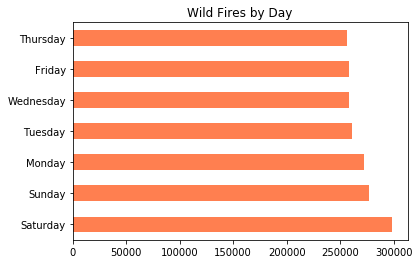

In [7]:
df['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral', title ="Wild Fires by Day")
plt.show()

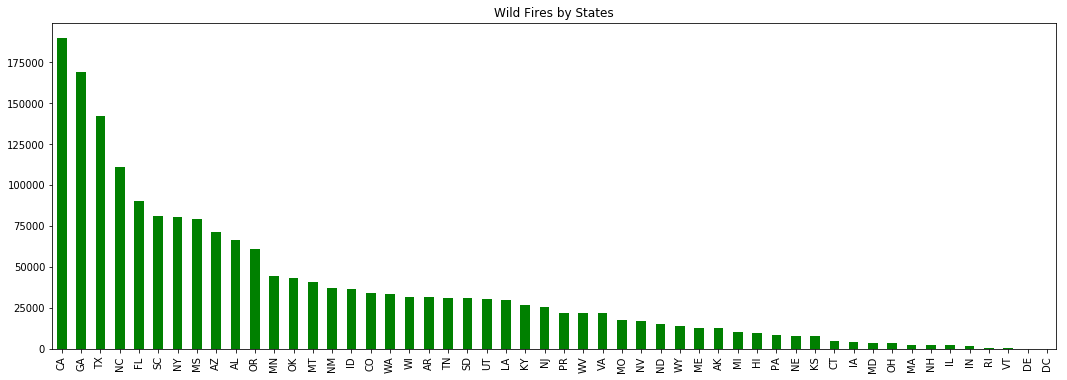

In [8]:
df['STATE'].value_counts().plot(kind='bar',color='green', figsize=(18, 6), title ="Wild Fires by States")
plt.show()

In [9]:
cause_df = df.groupby(['STAT_CAUSE_DESCR']).size().reset_index(name='COUNT')

In [10]:
print(cause_df)

     STAT_CAUSE_DESCR   COUNT
0               Arson  281455
1            Campfire   76139
2            Children   61167
3      Debris Burning  429028
4       Equipment Use  147612
5           Fireworks   11500
6           Lightning  278468
7       Miscellaneous  323805
8   Missing/Undefined  166723
9           Powerline   14448
10           Railroad   33455
11            Smoking   52869
12          Structure    3796


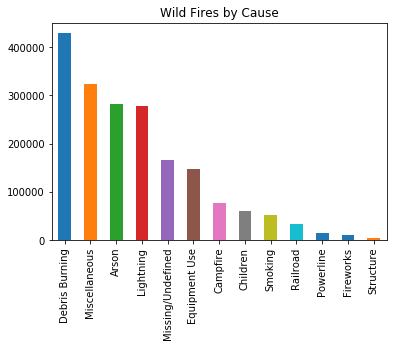

In [11]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar', title ="Wild Fires by Cause")

# Support Vector Machine (SVM)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
df['MONTH'] = le.fit_transform(df['MONTH'])
df['FIRE_SIZE_CLASS'] = le.fit_transform(df['FIRE_SIZE_CLASS'])
print(df.head())

   STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE DISCOVERY_DATE  FIRE_SIZE  \
0                 7  40.036944 -121.005833      4     2005-02-02       0.10   
1                 6  38.933056 -120.404444      4     2004-05-12       0.25   
2                 3  38.984167 -120.735556      4     2004-05-31       0.10   
3                 6  38.559167 -119.913333      4     2004-06-28       0.10   
4                 6  38.559167 -119.933056      4     2004-06-28       0.10   

  SOURCE_REPORTING_UNIT_NAME  FIRE_SIZE_CLASS  FIRE_YEAR  CONT_DATE  \
0     Plumas National Forest                0       2005 2005-02-02   
1   Eldorado National Forest                0       2004 2004-05-12   
2   Eldorado National Forest                0       2004 2004-05-31   
3   Eldorado National Forest                0       2004 2004-07-03   
4   Eldorado National Forest                0       2004 2004-07-03   

   DAY_OF_WEEK  MONTH  
0            6      1  
1            6      4  
2            1      4  
3 

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split 

X = df[['FIRE_YEAR','DAY_OF_WEEK','MONTH','STATE', 'LATITUDE','LONGITUDE','FIRE_SIZE_CLASS']]
y = df['STAT_CAUSE_DESCR']

# df = df.head(50000)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
model = svm.SVC(gamma='scale')

model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = model.predict(X_test)
y_pred 

array([6, 6, 6, ..., 7, 6, 6])

In [23]:
from sklearn.metrics import classification_report,accuracy_score  
print("Classification Report")
print(classification_report(y_test,y_pred))  
print("Score for SVM is:",model.score(X_train, y_train))
print("Accuracy score:",accuracy_score(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.63      0.49       809
           1       0.00      0.00      0.00      1329
           2       0.00      0.00      0.00        74
           3       0.27      0.01      0.03       469
           4       0.00      0.00      0.00       350
           6       0.62      0.97      0.76      5475
           7       0.25      0.02      0.04      1277
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00       169

   micro avg       0.59      0.59      0.59     10000
   macro avg       0.17      0.18      0.15     10000
weighted avg       0.42      0.59      0.46     10000



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score for SVM is: 0.58305
Accuracy score: 0.5871


# Confusion Matrix

In [24]:
from pandas_ml import ConfusionMatrix

confusion_matrix = ConfusionMatrix(y_test, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted    0  1  2  3  4     6   7  10  11  __all__
Actual                                               
0           34  1  0  0  0   215   4   0   0      254
1           36  1  0  1  0   236   3   0   0      277
2            2  0  0  0  0    13   0   0   0       15
3           17  0  0  0  0   110   0   0   0      127
4           13  0  0  0  0    59   0   0   0       72
6          113  1  0  2  0   867  16   0   0      999
7           33  0  0  2  0   245   1   0   0      281
10           1  0  0  0  0     8   0   0   0        9
11           5  0  0  0  0    30   0   0   0       35
__all__    254  3  0  5  0  1783  24   0   0     2069


/anaconda3/lib/python3.7/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


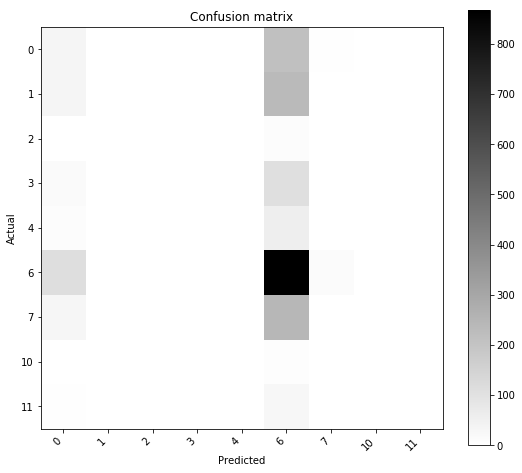

In [25]:
confusion_matrix.plot()

# Corelation Matrix

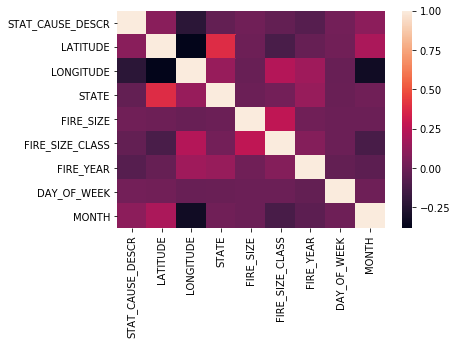

In [26]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Decision Tree Classifier

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Classification Report")
print(classification_report(y_test,y_pred))  

print("Accuracy score:",accuracy_score(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       809
           1       0.40      0.40      0.40      1329
           2       0.02      0.03      0.03        74
           3       0.24      0.26      0.25       469
           4       0.23      0.25      0.24       350
           6       0.83      0.82      0.82      5475
           7       0.33      0.31      0.32      1277
          10       0.30      0.38      0.33        48
          11       0.13      0.14      0.13       169

   micro avg       0.61      0.61      0.61     10000
   macro avg       0.33      0.34      0.33     10000
weighted avg       0.61      0.61      0.61     10000

Accuracy score: 0.6051


# Predict fire severity (FIRE_SIZE_CLASS)

In [32]:
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
df['MONTH'] = le.fit_transform(df['MONTH'])
df['FIRE_SIZE_CLASS'] = le.fit_transform(df['FIRE_SIZE_CLASS'])
df['STATE'] = le.fit_transform(df['STATE'])
X = df[['FIRE_YEAR','DAY_OF_WEEK','MONTH','STATE', 'LATITUDE','LONGITUDE','STAT_CAUSE_DESCR']]
y = df['FIRE_SIZE_CLASS']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 


array([0, 1, 0, ..., 0, 0, 0])

In [35]:
print("Classification Report")
print(classification_report(y_test,y_pred))  
print("Score for SVM is:",model.score(X_train, y_train))
print("Accuracy score:",accuracy_score(y_test,y_pred))

y_test

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      6338
           1       0.53      0.25      0.34      2622
           2       0.00      0.00      0.00       604
           3       0.00      0.00      0.00       162
           4       0.00      0.00      0.00       110
           5       0.00      0.00      0.00       106
           6       0.00      0.00      0.00        58

   micro avg       0.67      0.67      0.67     10000
   macro avg       0.18      0.17      0.16     10000
weighted avg       0.58      0.67      0.60     10000



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score for SVM is: 0.663275
Accuracy score: 0.6734


40257    2
34375    1
36743    1
1548     0
44682    2
1227     0
3961     0
17403    0
5150     1
7778     0
45412    0
36672    0
45505    0
44832    0
3220     1
30181    1
23927    0
5540     0
45183    0
34747    0
23300    0
4455     1
11901    0
37148    1
25823    0
42383    0
16968    0
42244    0
2165     0
27553    0
        ..
32503    0
7860     0
32491    1
14411    0
25150    4
23866    0
16095    0
43760    0
14060    1
25437    0
40639    0
9887     1
23409    2
13070    0
9498     0
17112    4
4289     1
36017    0
10122    0
5855     0
44538    1
48723    0
30761    0
11577    0
9137     0
18725    0
2563     0
39323    0
38992    0
43992    1
Name: Actual, Length: 10000, dtype: int64

In [46]:
confusion_matrix = ConfusionMatrix(y_test, y_pred)
print("F1-score: %f"%(f1_score(y_test,y_pred,average='macro')))
print("Accuracy: %f"%(accuracy_score(y_test,y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix)

F1-score: 0.163450
Accuracy: 0.673400
Confusion matrix:
Predicted     0    1  2  3  4  5  6  __all__
Actual                                      
0          1026  147  0  0  0  0  0     1173
1           531   77  0  0  0  0  0      608
2           135   20  0  0  0  0  0      155
3            20    4  0  0  0  0  0       24
4            18    2  0  0  0  0  0       20
5            15    2  0  0  0  0  0       17
6             8    1  0  0  0  0  0        9
__all__    1753  253  0  0  0  0  0     2006


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
